In [1]:
# Import necessary packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Read data
folder_name = 'tables'
bias_data = pd.read_csv(os.path.join(folder_name, 'final_bias_favor_data.csv'),index_col=[0])

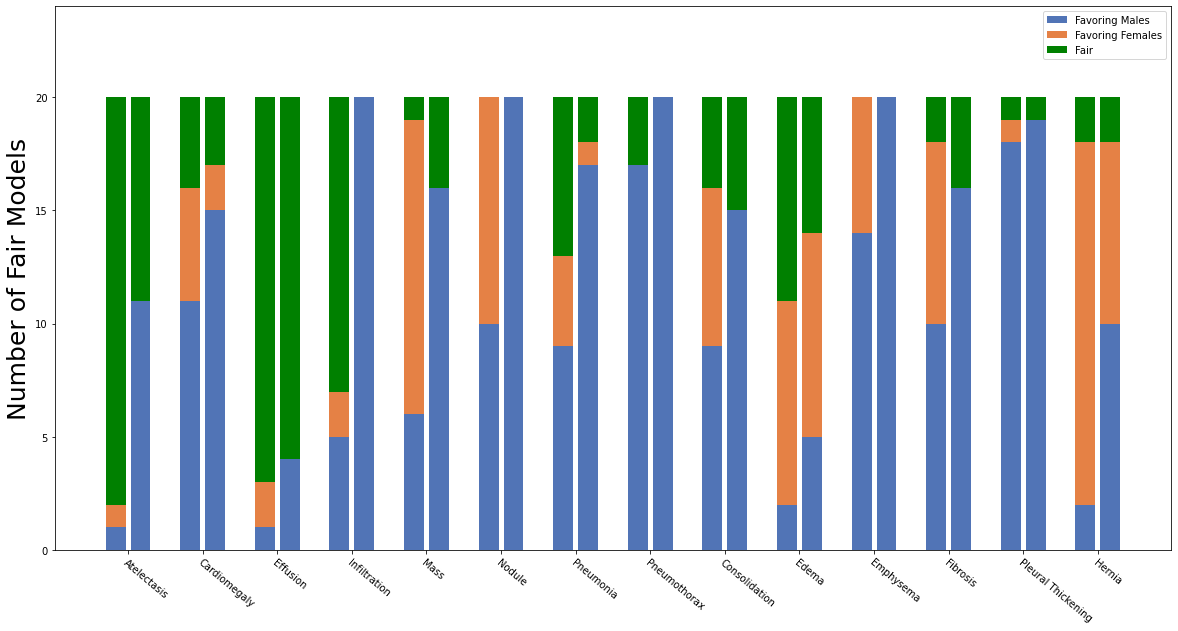

In [3]:
# Make graph
eps = 0.5
x_pos = np.array([0,3,6,9,12,15,18,21,24,27,30,33,36,39])
x = list(bias_data.index)
x[12] = 'Pleural Thickening'

# Make data
favor_male_fmodel = bias_data['0/100 bias f'].values
favor_female_fmodel = bias_data['0/100 bias m'].values
fair_fmodel = 20 - favor_male_fmodel - favor_female_fmodel 

favor_male_mmodel = bias_data['100/0 bias f'].values
favor_female_mmodel = bias_data['100/0 bias m'].values
fair_mmodel = 20 - favor_male_mmodel - favor_female_mmodel

# plot
plt.figure(figsize=(20, 10))
plt.bar(x_pos-eps, favor_male_fmodel, color='#5174b6',label = 'Favoring Males')
plt.bar(x_pos-eps, favor_female_fmodel, bottom=favor_male_fmodel, color='#e58145', label = 'Favoring Females')
plt.bar(x_pos-eps, fair_fmodel, bottom=20-fair_fmodel, color='green', label = 'Fair')
plt.bar(x_pos+eps, favor_male_mmodel, color='#5174b6')
plt.bar(x_pos+eps, favor_female_mmodel, bottom=favor_male_mmodel, color='#e58145')
plt.bar(x_pos+eps, fair_mmodel, bottom=20-fair_mmodel, color='green')
plt.xticks(rotation=320)
plt.xticks(x_pos, x, ha = 'left', rotation_mode = 'anchor')
plt.ylim([0,24])
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.ylabel('Number of Fair Models', fontsize = 25)
plt.legend()
plt.savefig('figures/final_all_conditions_graph.pdf',bbox_inches = 'tight')

In [4]:
# Read data to figure out poor disease labels
models = ['train100%_female_images','train75%_female_images','train50%_female_images',
          'train25%_female_images','train0%_female_images']
for model in models:
    data = pd.read_csv('tables/' + model + '_correction.csv',index_col=[0])
    sub_data = data[data['Average Initial J-stat'] <= 0.4]
    print(sub_data.index)

Index(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis'], dtype='object')
Index(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis', 'Hernia'], dtype='object')
Index(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis'], dtype='object')
Index(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis'], dtype='object')
Index(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis', 'Hernia'], dtype='object')


In [5]:
# Drop disease labels that had poor performance
sub_bias_data = bias_data.drop(['Infiltration', 'Nodule', 'Pneumonia', 'Fibrosis'])

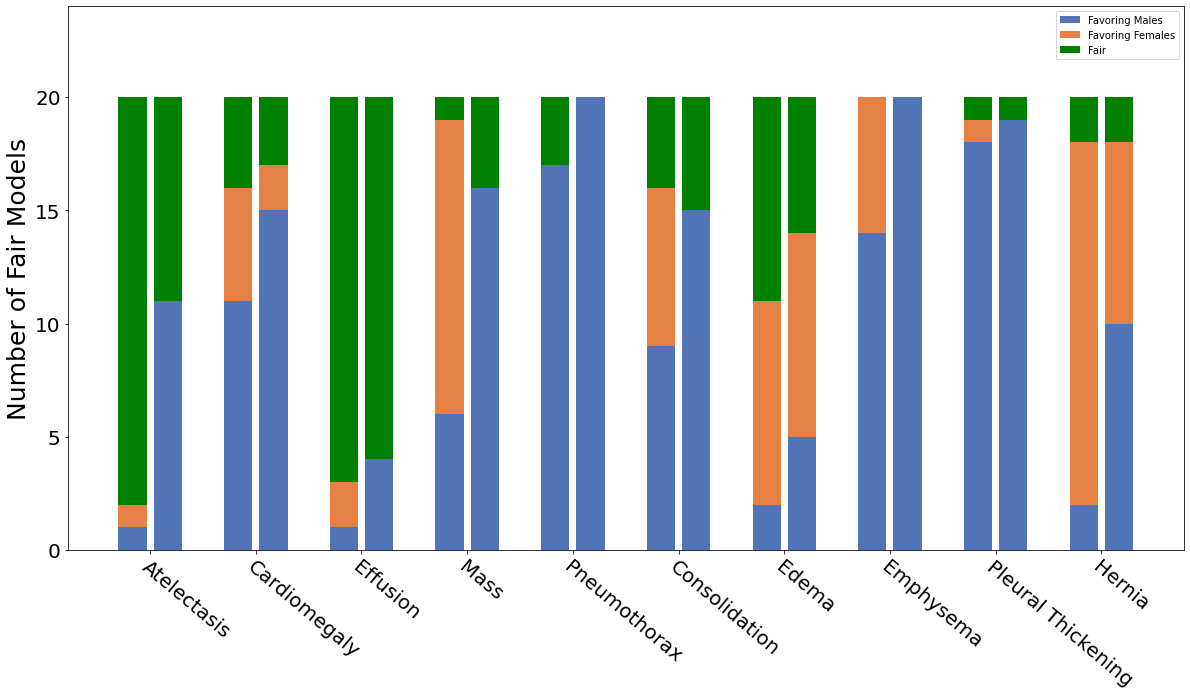

In [6]:
# Make graph
eps = 0.5
x_pos = np.array([0,3,6,9,12,15,18,21,24,27])
x = list(sub_bias_data.index)
x[8] = 'Pleural Thickening'

# Make data
favor_male_fmodel = sub_bias_data['0/100 bias f'].values
favor_female_fmodel = sub_bias_data['0/100 bias m'].values
fair_fmodel = 20 - favor_male_fmodel - favor_female_fmodel 

favor_male_mmodel = sub_bias_data['100/0 bias f'].values
favor_female_mmodel = sub_bias_data['100/0 bias m'].values
fair_mmodel = 20 - favor_male_mmodel - favor_female_mmodel

# plot
plt.figure(figsize=(20, 10))
plt.bar(x_pos-eps, favor_male_fmodel, color='#5174b6',label = 'Favoring Males')
plt.bar(x_pos-eps, favor_female_fmodel, bottom=favor_male_fmodel, color='#e58145', label = 'Favoring Females')
plt.bar(x_pos-eps, fair_fmodel, bottom=20-fair_fmodel, color='green', label = 'Fair')
plt.bar(x_pos+eps, favor_male_mmodel, color='#5174b6')
plt.bar(x_pos+eps, favor_female_mmodel, bottom=favor_male_mmodel, color='#e58145')
plt.bar(x_pos+eps, fair_mmodel, bottom=20-fair_mmodel, color='green')
plt.xticks(rotation=320)
plt.xticks(x_pos, x, ha = 'left', rotation_mode = 'anchor')
plt.ylim([0,24])
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.ylabel('Number of Fair Models', fontsize = 25)
plt.legend()
plt.savefig('figures/final_sub_conditions_graph.pdf',bbox_inches = 'tight')